# Solver

## Config file

In [2]:
from pathlib import Path
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HERE = Path(os.getcwd()) # Path(__file__) won't work in Jupyter
HERE

PosixPath('/home/hangman/Documents/solver')

In [ ]:
with open(HERE / 'config' / 'settings.yaml.bak') as f:
    config = yaml.safe_load(f)
config

{'time_end': 3,
 'time_step': 0.05,
 'f_0': 2,
 'mass': 1.0,
 'viscosity': 1.0,
 'ft_fname': 'f_t.csv',
 'area_fname': 'area.csv'}

In [61]:
new_config = {
    'time_end'  : 5,
    'time_step' : 0.01,
    'f_0'       : 0,
    'mass'      : 2,
    'viscosity' : 10,
    'ft_fname'  : 'f_t.csv',
    'area_fname': 'area.csv',
}

In [62]:
with open(HERE / 'config' / 'settings.yaml', 'w') as f:
    yaml.dump(new_config, f)

## Simulation

`cargo run` will read `config/settings.yaml` and produce:

- `result/`
  - `<config["area_fname"]>.csv`
  - `<config["ft_fname"]>.csv`

In [63]:
!cargo run

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/solver`
Solver { time_end: 5.0, time_step: 0.01, f_0: 0.0, mass: 2.0, viscosity: 10.0, gravity: 9.8 }

=== Final Values f(5) ===
Analytical solution: 1.960000
Euler method:        1.959999
Trapezoidal method:  1.959999

=== Integrals ∫f(t)dt from 0 to 5 ===
Analytical integral:           9.407899
Euler ODE + Trap integration:  9.417781
Trap ODE + Trap integration:   9.407731



## Plot

In [64]:
def plot_data(df) -> plt:
    plt.plot(
        df["timestamp"], df["euler"], label="euler", color="blue"
    )
    plt.plot(
        df["timestamp"], df["trapezoid"], label="trapezoid", color="orange"
    )
    plt.legend()
    return plt

### $f(t)$ (1st integral)

In [65]:
ft_df = pd.read_csv(
    HERE / "result" / "f_t.csv",
)
ft_df

,timestamp,euler,trapezoid
0,0.000000,0.000000,0.000000
1,0.010000,0.098000,0.095550
2,0.020000,0.191100,0.186442
3,0.030000,0.279545,0.272903
4,0.040000,0.363568,0.355149
...,...,...,...
496,4.960019,1.959999,1.959999
497,4.970019,1.959999,1.959999
498,4.980019,1.959999,1.959999
499,4.990019,1.959999,1.959999


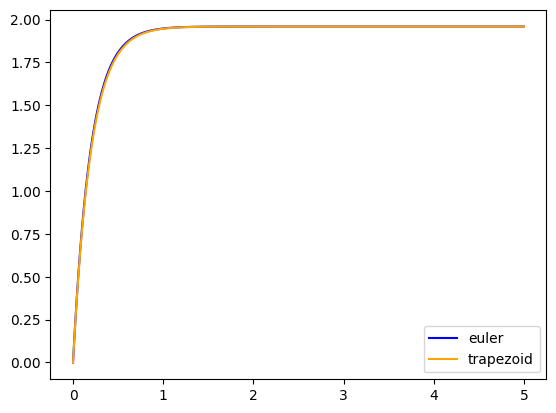

In [66]:
plot_data(ft_df).show()

### area (2nd integral)

In [67]:
area_df = pd.read_csv(
    HERE / "result" / "area.csv",
)
area_df

,timestamp,euler,trapezoid
0,0.000000,0.000000,0.000000
1,0.010000,0.000490,0.000478
2,0.020000,0.001935,0.001888
3,0.030000,0.004289,0.004184
4,0.040000,0.007504,0.007325
...,...,...,...
496,4.960019,9.339381,9.329331
497,4.970019,9.358981,9.348931
498,4.980019,9.378581,9.368531
499,4.990019,9.398181,9.388131


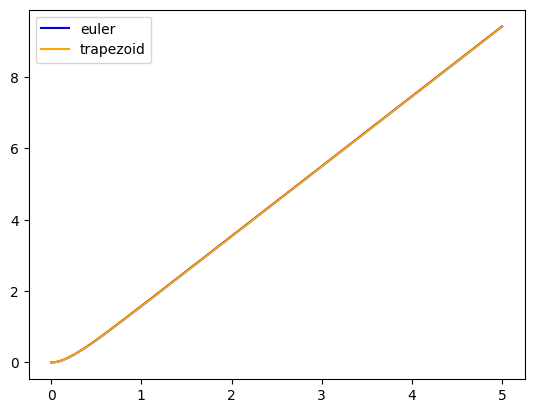

In [68]:
plot_data(area_df).show()